In [1]:
%matplotlib inline

In [3]:
!pip install ddbg==0.0.2

  Found existing installation: ddbg 0.0.1
    Uninstalling ddbg-0.0.1:
      Successfully uninstalled ddbg-0.0.1


In [4]:
from ddbg import DatasetDebugger
ddbg_project = DatasetDebugger.from_recipe('fashion_mnist')

In [5]:
%load_ext tensorboard
%tensorboard --logdir outputs/tb_logs/

<IPython.core.display.Javascript object>

In [6]:
ddbg_results = ddbg_project.calc_train_dataset__mislabel_scores()

2020-09-05 01:01:38,938 ddbg         INFO     Start dataset analysis..


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:37: UserWarning: Could not log computational graph since the `model.example_input_array` attribute is not set or `input_array` was not given
  warnings.warn(*args, **kwargs)

  | Name                   | Type       | Para

2020-09-05 01:02:10,098 ddbg         INFO     Train epoch 0 Loss: 196.647 Accuracy: 66.78%
2020-09-05 01:02:21,087 ddbg         INFO     Train epoch 1 Loss: 111.678 Accuracy: 83.15%
2020-09-05 01:02:32,155 ddbg         INFO     Train epoch 2 Loss: 92.9259 Accuracy: 86.41%
2020-09-05 01:02:43,042 ddbg         INFO     Train epoch 3 Loss: 80.7179 Accuracy: 88.37%
2020-09-05 01:02:53,985 ddbg         INFO     Train epoch 4 Loss: 72.8705 Accuracy: 89.45%
2020-09-05 01:03:05,035 ddbg         INFO     Train epoch 5 Loss: 65.2799 Accuracy: 90.50%
2020-09-05 01:03:16,222 ddbg         INFO     Train epoch 6 Loss: 60.805 Accuracy: 91.18%
2020-09-05 01:03:27,541 ddbg         INFO     Train epoch 7 Loss: 56.5837 Accuracy: 91.72%
2020-09-05 01:03:38,860 ddbg         INFO     Train epoch 8 Loss: 51.2931 Accuracy: 92.48%
2020-09-05 01:03:49,996 ddbg         INFO     Train epoch 9 Loss: 47.2797 Accuracy: 92.99%
2020-09-05 01:04:01,279 ddbg         INFO     Train epoch 10 Loss: 44.5767 Accuracy: 93.39%

2020-09-05 01:11:05,256 ddbg         INFO     Base model Test_accuracy: 90.83%
2020-09-05 01:11:05,259 ddbg         INFO     Training base model done.
2020-09-05 01:11:05,260 ddbg         INFO     Calculating self influence..


2020-09-05 01:13:32,158 ddbg         INFO     Calculating proponents & opponents..


2020-09-05 01:13:47,896 ddbg         INFO     Precomputing dataset proponents & opponents


2020-09-05 01:48:21,754 ddbg         INFO     Training embed model..
2020-09-05 01:48:21,777 ddbg         INFO     loaded base model epoch 40
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params
------------------------------------------------
0 | criterion | OnlineTripletLoss | 0     
1 | model     | Embed2Model       | 380 K 


2020-09-05 01:49:20,128 ddbg         INFO     Train Epoch 0 Loss: 980380	Average nonzero triplets: 1470.06
2020-09-05 01:50:17,608 ddbg         INFO     Train Epoch 1 Loss: 53567.9	Average nonzero triplets: 1436.73
2020-09-05 01:51:14,361 ddbg         INFO     Train Epoch 2 Loss: 22735.9	Average nonzero triplets: 1188.19
2020-09-05 01:52:10,329 ddbg         INFO     Train Epoch 3 Loss: 11108.2	Average nonzero triplets: 1012.34
2020-09-05 01:53:05,668 ddbg         INFO     Train Epoch 4 Loss: 7961.01	Average nonzero triplets: 864.07
2020-09-05 01:54:00,813 ddbg         INFO     Train Epoch 5 Loss: 5639.01	Average nonzero triplets: 754.18
2020-09-05 01:54:55,196 ddbg         INFO     Train Epoch 6 Loss: 3869.67	Average nonzero triplets: 652.36
2020-09-05 01:55:48,726 ddbg         INFO     Train Epoch 7 Loss: 3015.67	Average nonzero triplets: 555.40
2020-09-05 01:56:43,687 ddbg         INFO     Train Epoch 8 Loss: 2677.95	Average nonzero triplets: 463.46
2020-09-05 01:57:37,839 ddbg      

2020-09-05 02:07:27,345 ddbg         INFO     Calculating mislabel scores..
2020-09-05 02:07:27,380 ddbg         INFO     Dataset analysis complete and saved to ./outputs/ddbg_results/fashion_mnist/embed2/ddbg_results.npy.


In [7]:
!tar czf ddbg_outputs.fashion_mnist.tz outputs

In [8]:
from ddbg import DdbgVisualize

In [9]:
ddbg_viz = DdbgVisualize( ddbg_project )

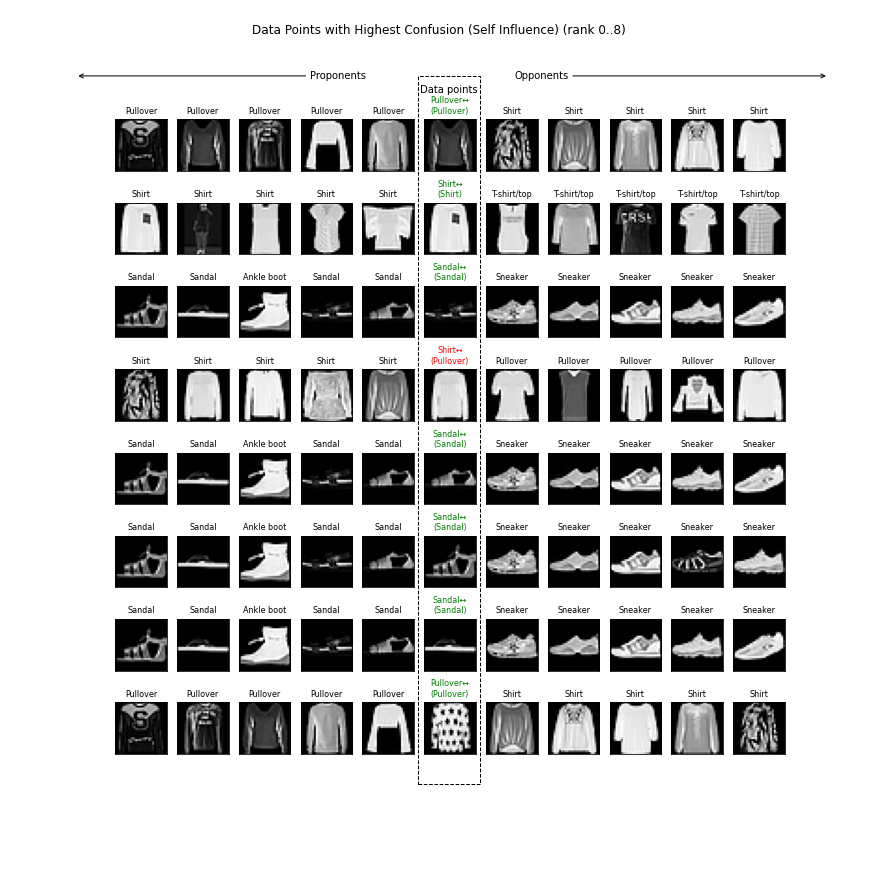

In [10]:
ddbg_viz.visualize_top_self_influence( ddbg_results, end_idx=8 )

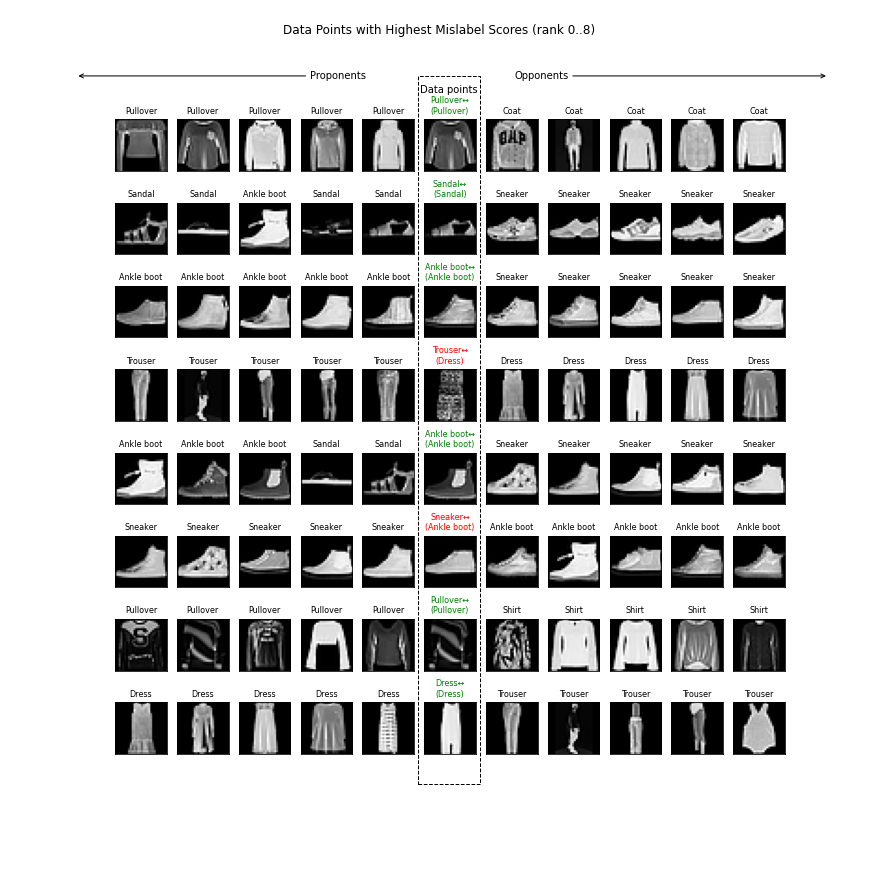

In [11]:
ddbg_viz.visualize_top_mislabel_score_items( ddbg_results, end_idx=8 )

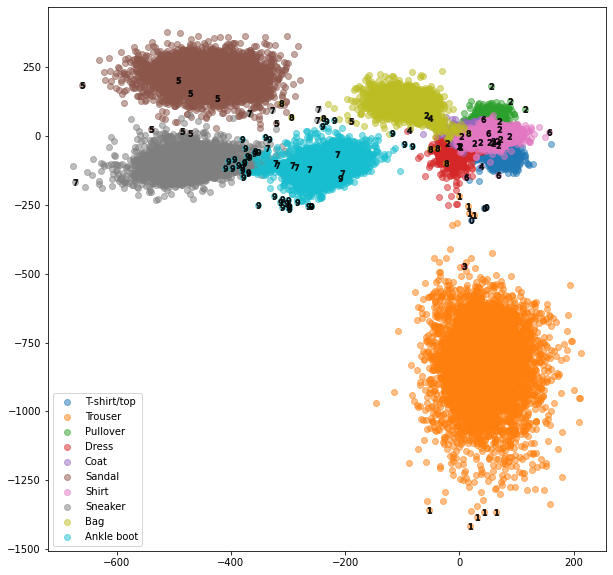

In [12]:
ddbg_viz.visualize_dataset_embeddings( ddbg_results )